# PMLX Einstein crossing time approximation
The one with caustic macro model
\begin{align*}
t_E = \text{1.647 days} \left(\frac{v}{300 \text{km/s}}\right)^{-1} \left(\frac{M_L}{M_\odot}\right)^{1/2} \left(\frac{D}{\text{1 kpc}}\right)^{1/2} \left(\frac{\mu_t}{100}\right)^{-1/2}
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
def tE(v,Ml,D):
    return 1.647*(v)*(Ml*D)**(1/2)

In [5]:
Ml = np.logspace(0,6,100)
D = np.logspace(-4,3,100)
T = tE(1,Ml[None,:],D[:,None])

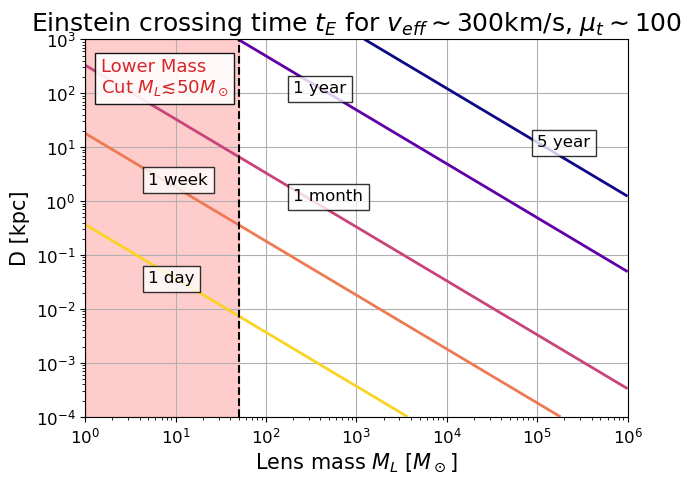

In [22]:
with PdfPages('./pmlx_te_estimation.pdf') as pp:
    figure(figsize=(7, 5), dpi=100)
    cs = plt.contour(Ml,D,T,locator=ticker.LogLocator(),
                         levels=np.array([1,7, 30,365,5*365]),
                         norm=colors.LogNorm(vmin=0.5,vmax=5*300),
                         cmap='plasma_r',
                         linewidths=2)
    """cs2 = plt.contour(Ml,D,T,locator=ticker.LogLocator(),
                         levels=np.array([1, 7, 30,365]),
                         norm=colors.LogNorm(vmin=0.5,vmax=100),
                         cmap='plasma_r',
                         linewidths=2)"""

    
    # Contour labels
    plt.text(1e5,1e1,'5 year',fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 4})
    plt.text(200,100,'1 year',fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 4})
    plt.text(200,1,'1 month',fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 4})
    plt.text(5,2,'1 week',fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 4})
    plt.text(5,0.3e-1,'1 day',fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 4})

    # Lower mass cut
    yl,yh = plt.gca().get_ylim()
    plt.axvline(1,color='black',ls='--')
    plt.axvline(50,color='black',ls='--')
    lower_mass_range = np.logspace(0,np.log10(50))
    plt.fill_between(lower_mass_range,yl,yh,color='red',alpha=0.2)
    plt.text(1.5,1e2,'Lower Mass\n'+r'Cut $M_L\lesssim50 M_\odot$',fontsize=13,color='tab:red', bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 4})
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('D [kpc]',fontsize=15)
    plt.xlabel('Lens mass $M_L$ [$M_\odot$]',fontsize=15)
    plt.title(r'Einstein crossing time $t_E$ for $v_{eff}\sim 300$km/s, $\mu_t\sim100$',fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    pp.savefig(bbox_inches='tight')

In [41]:
lb

<a list of 3 text.Text objects>